In [1]:
pwd

'/content'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


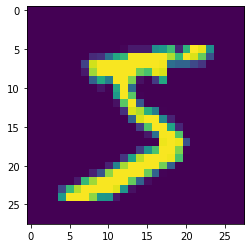

In [5]:
single_image = x_train[0]
plt.imshow(single_image )

In [6]:
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train= to_categorical(y_train,10)

In [7]:
len(x_train)

60000

In [8]:
#batch_size, height, width, 1 color channel since it is greyscale
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [10]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer softmax --multi class problem
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [12]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 3ms/step - loss: 0.4311 - accuracy: 0.9342 - val_loss: 0.0842 - val_accuracy: 0.9766
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 0.0805 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0832 - val_accuracy: 0.9778


In [13]:
metrics = pd.DataFrame(model.history.history)

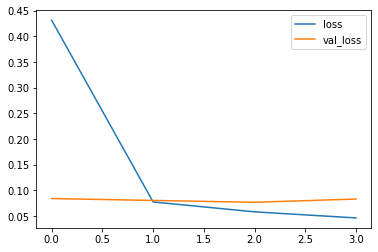

In [14]:
metrics[['loss','val_loss']].plot()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
confusion_matrix(y_test,predictions)

array([[ 971,    2,    0,    0,    2,    1,    1,    0,    1,    2],
       [   0, 1129,    0,    4,    1,    0,    0,    0,    1,    0],
       [   1,   15,  995,    2,    1,    0,    0,    9,    8,    1],
       [   0,    0,    0, 1000,    0,    4,    0,    1,    5,    0],
       [   0,    3,    0,    1,  962,    1,    1,    3,    4,    7],
       [   3,    0,    0,    9,    0,  868,    1,    0,    9,    2],
       [   7,    4,    0,    1,    5,    3,  929,    0,    9,    0],
       [   0,    7,    5,    6,    3,    1,    0,  993,    5,    8],
       [   2,    1,    0,    5,    0,    2,    0,    3,  957,    4],
       [   3,    3,    0,    4,    7,    7,    0,    2,    9,  974]])

In [19]:
import seaborn as sns

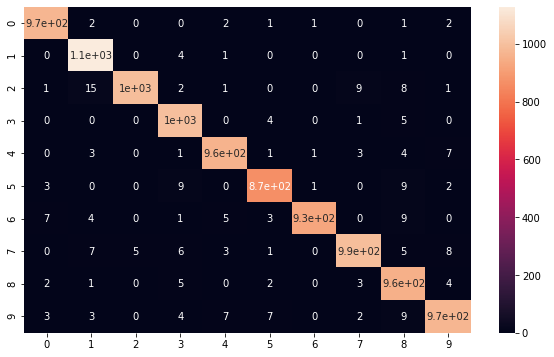

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [21]:
my_number=x_test[0]
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])